In [1]:
import sys
sys.path.insert(0,'/data/git/ase/')
from ase.build import bulk
from ase.visualize.plot import plot_atoms
from ase.build.surfaces_with_termination import surfaces_with_termination
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(25,10))
import numpy as np
from ase.build import sort
from ase.io.vasp import read_vasp
from ase.build import surface, make_supercell
from ase.build import sort
from ase.geometry import get_layers
import Tools as tl

from ase.visualize import view

## Creo celda ZrO2 2x2 y un sitio tipo 'hollow1'

In [2]:
zro2 = read_vasp('Structure/POSCAR')
ZrO2001Oterm = surfaces_with_termination(zro2, [0,0,1],layers=4, vacuum=15., termination='O',verbose=True, symmetric=True)

([4], ['Zr']) ([20], ['O'])
([3], ['O']) ([18], ['O'])
([5], ['Zr']) ([21], ['O'])
([2], ['O']) ([19], ['O'])


In [3]:
ZrO2001Oterm_2x2_unsorted = [make_supercell(thisurface,[[2,0,0],[0,2,0],[0,0,1]],tol=1e-10, wrap=True) for thisurface in ZrO2001Oterm]
ZrO2001Oterm_2x2 = sort(ZrO2001Oterm_2x2_unsorted[0])

layer, height = get_layers(ZrO2001Oterm_2x2, (0,0,1), tolerance=0.7)
h_sitios = max(height)
hollow1 = ZrO2001Oterm_2x2.positions[layer == 13].mean(axis=0)[:2]
hollow1 = np.append(hollow1, h_sitios)
ZrO2001Oterm_2x2.info = {'adatom': {'top': {'hollow1': hollow1}}}
onhollow1 = tl.make_adstruc(ZrO2001Oterm_2x2, 'hollow1', thesite='hollow1', theface='top',)

## Creo celda Zr 1x1, roto, hago simetria, agrego sitio tipo "top"

In [4]:
zrhcp = bulk('Zr', crystalstructure='hcp')
zrortho = bulk('Zr', crystalstructure='hcp', orthorhombic=True)

Zr0001 = surfaces_with_termination(zrortho, (0, 0, 1), 5, vacuum=10, termination='Zr')[0]

# Lo de arriba no estaria funcionando. 

In [20]:
zrsymmetric = tl.make_symmetric(Zr0001,natoms=2)

In [21]:
angs = np.linspace(0,45,4)

In [27]:
notyetrotated = [zrsymmetric.copy() for ang in angs ]

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]

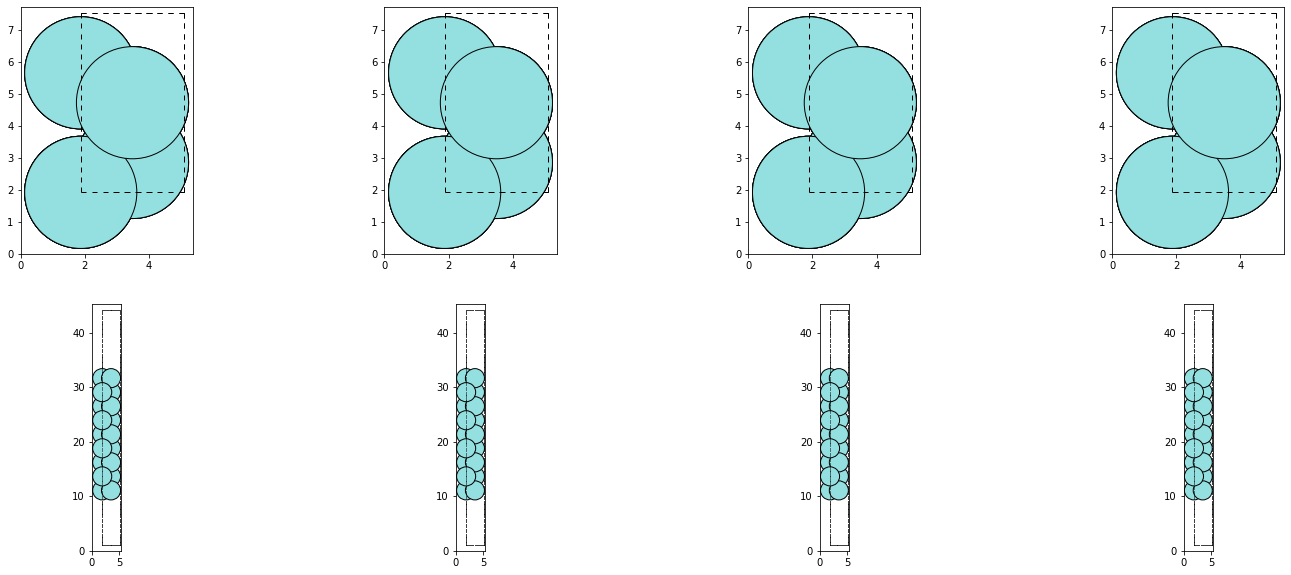

In [31]:
fig, ax = plt.subplots(2, len(scaled_rotated))
[plot_atoms(this, ax=thisax) for this,thisax  in zip(notyetrotated,ax[0,:])]
[plot_atoms(this, ax=thisax, rotation='90x') for this,thisax  in zip(notyetrotated,ax[1,:])]

In [34]:
scaled = [tl.scalecell(thisatoms, ZrO2001Oterm_2x2.cell.copy()) for thisatoms in notyetrotated]

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]

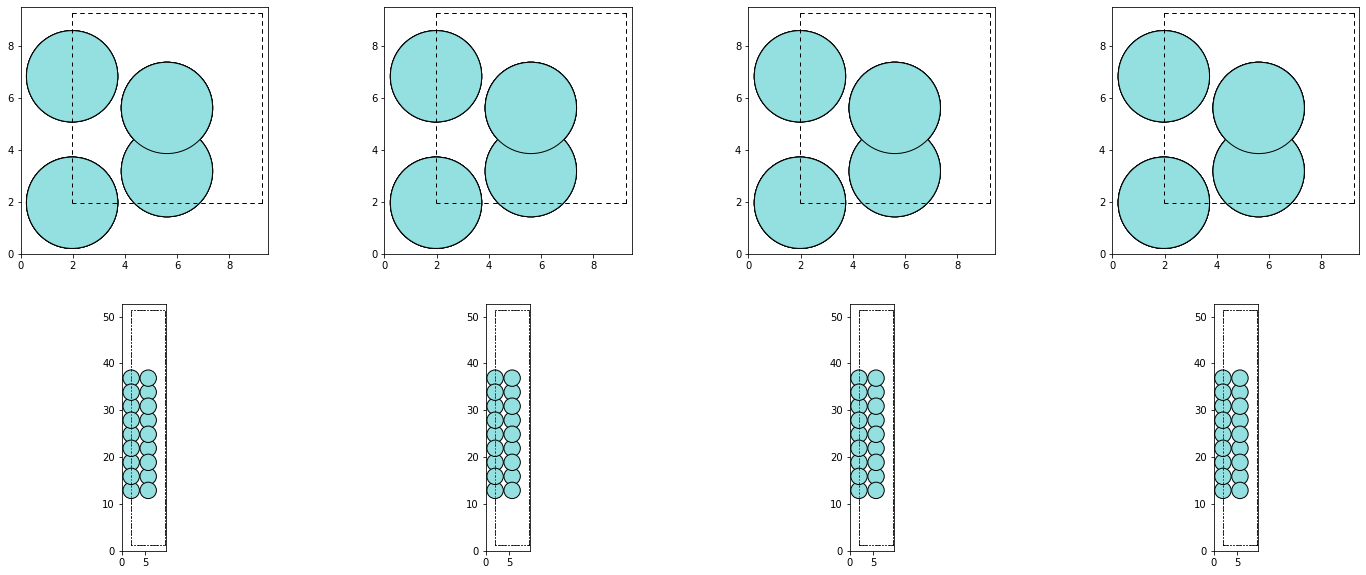

In [35]:
fig, ax = plt.subplots(2, len(scaled_rotated))
[plot_atoms(this, ax=thisax) for this,thisax  in zip(scaled,ax[0,:])]
[plot_atoms(this, ax=thisax, rotation='90x') for this,thisax  in zip(scaled,ax[1,:])]

In [36]:
scaled_rotated =  [thiscaled.rotate(ang,'z') for thiscaled, ang in zip(scaled, angs)]

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]

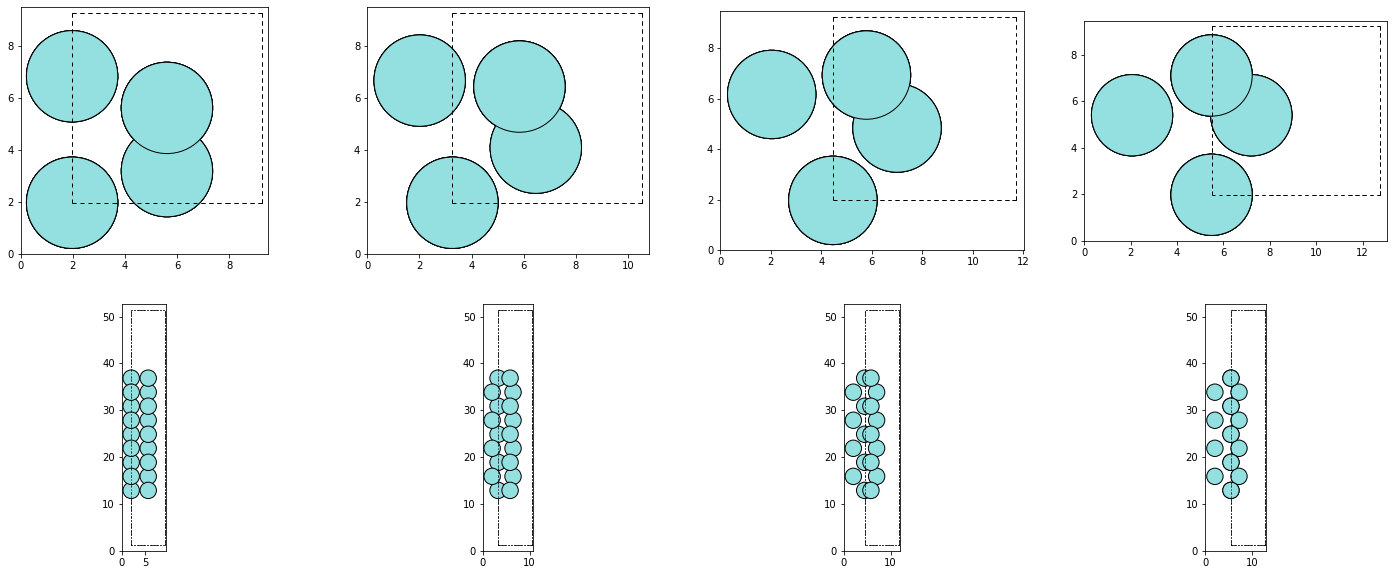

In [38]:
fig, ax = plt.subplots(2, len(scaled))
[plot_atoms(thiscaled, ax=thisax) for thiscaled,thisax  in zip(scaled,ax[0,:])]
[plot_atoms(thiscaled, ax=thisax, rotation='90x') for thiscaled,thisax  in zip(scaled,ax[1,:])]

In [40]:
getsites = [tl.get_adsite(this,face='bottom', site='top') for this in scaled]

In [41]:
thestack, part1, part2 = tl.stack(ZrO2001Oterm_2x2, scaled[3], 'hollow1', 'top', 4, return_parts = True)

In [42]:
thestack.wrap(pretty_translation=True)

(<Axes:>, <Axes:>, <Axes:>)

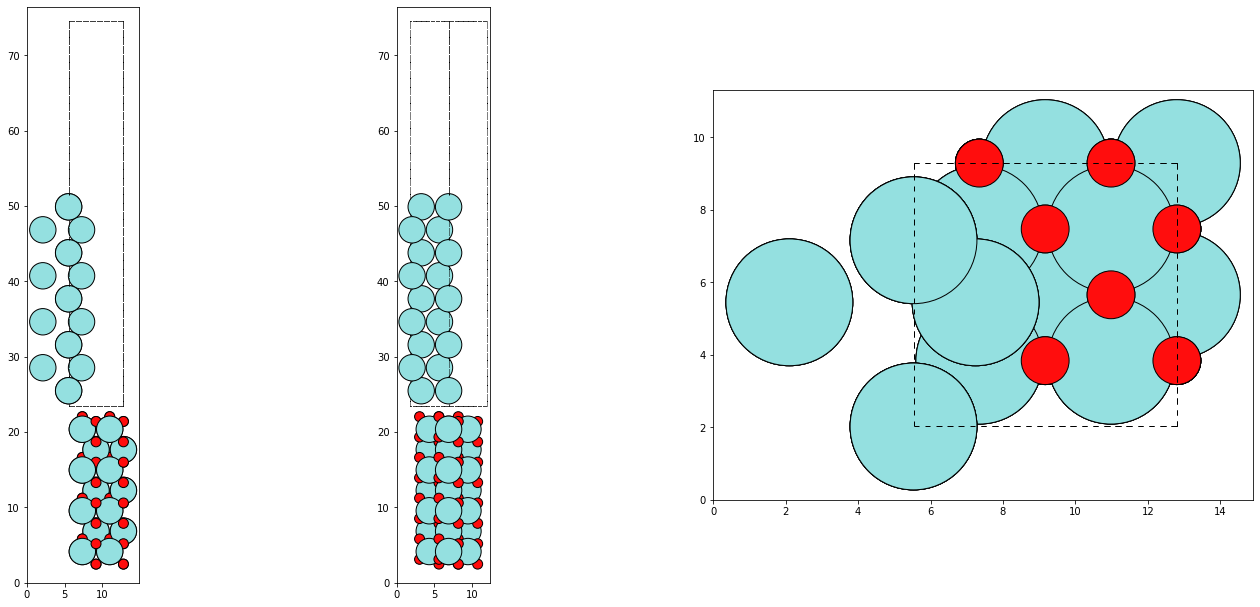

In [44]:
tl.plotviews(thestack)